# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
from scipy.stats import ttest_ind
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

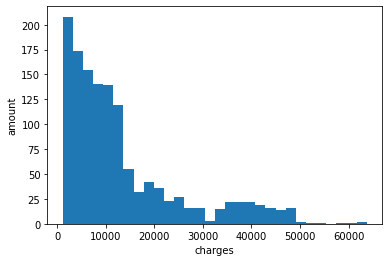

In [5]:
_ = plt.hist(medical.charges, bins=30)
_ = plt.xlabel('charges')
_ = plt.ylabel('amount')

In [6]:
mean = round(np.mean(medical.charges),2)
std = round(np.std(medical.charges),2)
print('Mean: ' + str(mean))
print('Standard Deviation: ' + str(std))

Mean: 13270.42
Standard Deviation: 12105.48


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ 
We can justify by explaining that we can expect a random sample of data to be close to our population, especially if it is a good size sample like this one. In this case, our random sampling has a mean of 13,270, so an average charge of under 12,000 is unlikely. The most appropriate frequentist test could be bootstrapping our sample and calculating the p-value of getting a mean of 13,270 with a null hypothesis of 12000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ 
    One sided interval because we only want to measure how likely it is that the mean is below 12,000. The critical value (t-value) would be 1.646 based on sample size and alpha of 0.05. I think the administrator does have cause for concern because the confidence interval is so wide, there is a lot of uncertainty around our sample

In [7]:
# t-value would be 1.646 based on sample size and alpha of 0.05
conf = 0.95
deg = len(medical) - 1
confidence_interval = t.interval(conf, deg, mean, std)
print(confidence_interval)

(-10477.382986659757, 37018.222986659755)


In [8]:
w_ins = medical[medical['insuranceclaim'] == 1]
wo_ins = medical[medical['insuranceclaim'] == 0]
print(w_ins.head())
print(wo_ins.head())

    age  sex    bmi  children  smoker  region     charges  insuranceclaim
0    19    0  27.90         0       1       3  16884.9240               1
1    18    1  33.77         1       0       2   1725.5523               1
4    32    1  28.88         0       0       1   3866.8552               1
6    46    0  33.44         1       0       2   8240.5896               1
10   25    1  26.22         0       0       0   2721.3208               1
   age  sex     bmi  children  smoker  region      charges  insuranceclaim
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
5   31    0  25.740         0       0       2   3756.62160               0
7   37    0  27.740         3       0       1   7281.50560               0
8   37    1  29.830         2       0       0   6406.41070               0


In [18]:
s0 = np.std(w_ins.charges, ddof=1)
s1 = np.std(wo_ins.charges, ddof=1)
x0 = np.mean(w_ins.charges)
x1 = np.mean(wo_ins.charges)
ins_chg = np.array(w_ins.charges)
no_ins_chg = np.array(wo_ins.charges)
print(ins_chg)
print(no_ins_chg)
print(s0, s1, x0, x1)

[16884.924     1725.5523    3866.8552    8240.5896    2721.3208
 27808.7251    1826.843    11090.7178   39611.7577   10797.3362
 10602.385    36837.467    13228.84695   4149.736     1137.011
 37701.8768   14001.1338    2775.19215  38711.       35585.576
  2198.18985  13770.0979   51194.55914  39774.2763   48173.361
  3046.062    20630.28351   3556.9223   38709.176     2211.13075
 23568.272    37742.5757   47496.49445  34303.1672   23244.7902
  8606.2174   14711.7438    1743.214    14235.072     5920.1041
 16577.7795   11741.726    11946.6259    7726.854    11356.6609
  1532.4697    2755.02095   6571.02435   7935.29115  37165.1638
 39836.519    21098.55405  43578.9394   11073.176     8026.6666
 11082.5772    2026.9741   30184.9367   47291.055    10226.2842
 22412.6485   15820.699     6186.127    21344.8467   30942.1918
 17560.37975   2867.1196   47055.5321   10825.2537   11881.358
  4646.759     2404.7338   30259.99556  11381.3254   19107.7796
  8601.3293    7740.337     2257.47525  395

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 
    1. Everybody has the same insurance coverage
    2. Those with and without insurance are being charged for the same services

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [10]:
#Pooled Standard Deviation Calc
num = ((len(w_ins) - 1) * (s0 **2)) + ((len(wo_ins) - 1) * (s1 **2))
denom = len(w_ins) + len(wo_ins) -2

std_pool = np.sqrt(num / denom)

print(std_pool)

11520.034268775256


In [12]:
#t-statistic calc
num1 = x0 - x1
denom1 = std_pool * np.sqrt((1 / len(w_ins)) + (1 / len(wo_ins)))
t = num1 / denom1
print(t)


11.89329903087671


In [22]:
#p-value calc
#p = np.sum(permutations == observed val) / len(permutations)
p = np.sum(ins_chg == np.mean(no_ins_chg)) / len(ins_chg)

print(p)

0.0


In [14]:
t_calc = ttest_ind(w_ins['charges'], wo_ins['charges'])
print(t_calc)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ I do not see an equivalent z-test function. My guess is because the z-test calculation involves the population as well?

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test